# Regressão Linear 

A regressão linear simples é um método de aprendizado supervisionado extremamente simples. É também um método paramétrico, visto que assumimos a relação linear entre os preditores e a variável resposta. 

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.style.use('dark_background')

### 01. Exemplo 01: Regressão Linear Simples

O conjunto de dados possui duas variáveis "Experiência (em meses)" e "Salário (em milhares $/ano)". Deste dataset podemos gerar algumas perguntas:

1. Será que o salário é influenciado pela experiência?
2. Podemos predizer o salário baseado na experiência? 

In [19]:
# Leitura do dataset
DATASET_PATH = './data/Experience-Salary.csv'
data = pd.read_csv(DATASET_PATH)

# Renomeando colunas 
data = data.rename({'exp(in months)': 'experience', 'salary(in thousands)': 'salary'}, axis=1)
data.head()

,experience,salary
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


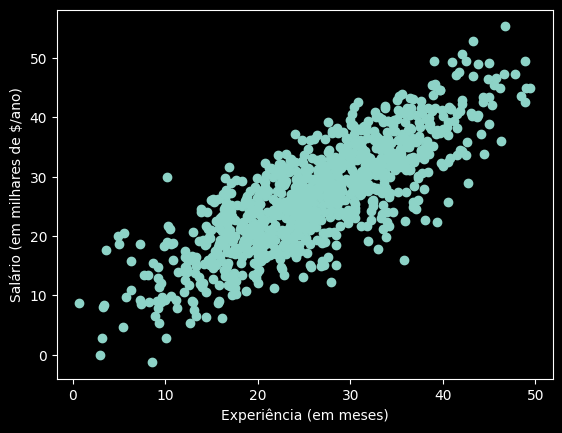

In [28]:
# Plotando os dados
plt.scatter(data.experience, data.salary,)
plt.xlabel("Experiência (em meses)")
plt.ylabel("Salário (em milhares de $/ano)")
plt.show()

In [49]:
# Variáveis: X -> preditora e Y -> resposta
X = ['experience']
Y = 'salary'

# Ajustando o modelo
model = LinearRegression()
model.fit(data[X], data[Y])

# Salvando os coeficientes
b0 = model.intercept_
b1 = model.coef_[0]

print(b0, b1)

5.198718564988564 0.8228466617029135


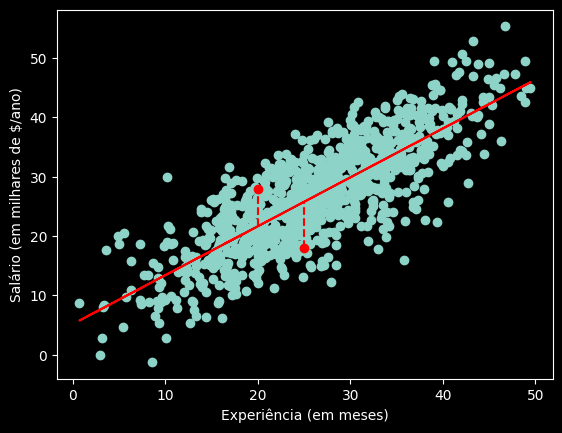

In [48]:
# Plotando todos os dados de treino
plt.scatter(data.experience, data.salary,)
plt.xlabel("Experiência (em meses)")
plt.ylabel("Salário (em milhares de $/ano)")

# Plotando a reta da regressão
plt.plot(data.experience, b0 + data.experience*b1, color='r')

# Plotando um exemplos de resíduo
plt.vlines(x=20, ymin=21.65, ymax=28, color='r', linestyles='--')
plt.scatter([20], [28], color='r')

plt.vlines(x=25, ymin=18, ymax=25.76, color='r', linestyles='--')
plt.scatter([25], [18], color='r')

# Mostrando o resultado
plt.show()